In [180]:
#Setting up
%pip -q install pycaret skimpy numpy pydotplus graphviz

Note: you may need to restart the kernel to use updated packages.


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 200    │ │ int32       │ 4     │                                                          │
│ │ Number of columns │ 5      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name              ┃ NA  ┃ NA %  ┃ mean   ┃ sd     ┃ p0  ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ CustomerID               │   0 │     0 │  100.5 │  57.88 │   1 │  50.75 │  100.5 │  150.2 │   200 │ ▇▇▇▇▇▇ │  │
│ │ Age                      │   0 │     0 │  38.85 │  13.97 │  18 │  28.75 │     36 │     49 │    70 │ ▆▇▅▅▃▂ │  │
│ │ Annual Income (k$)       │   0 │     0 │  60.56 │  26.26 │  15 │   41.5 │   61.5 │     78 │   137 │ ▅▇▇▅▂▁ │  │
│ │ Spending Score (1-100)   │   0 │     0 │   50.2 │  25.82 │   1 │  34.75 │     50 │     73 │    99 │ ▅▃▇▇▅▅ │  │
│ └──────────────────────────┴─────┴───────┴────────┴────────┴─────┴────────┴────────┴────────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Gender                    │       0 │          0 │                            1 │                      200 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

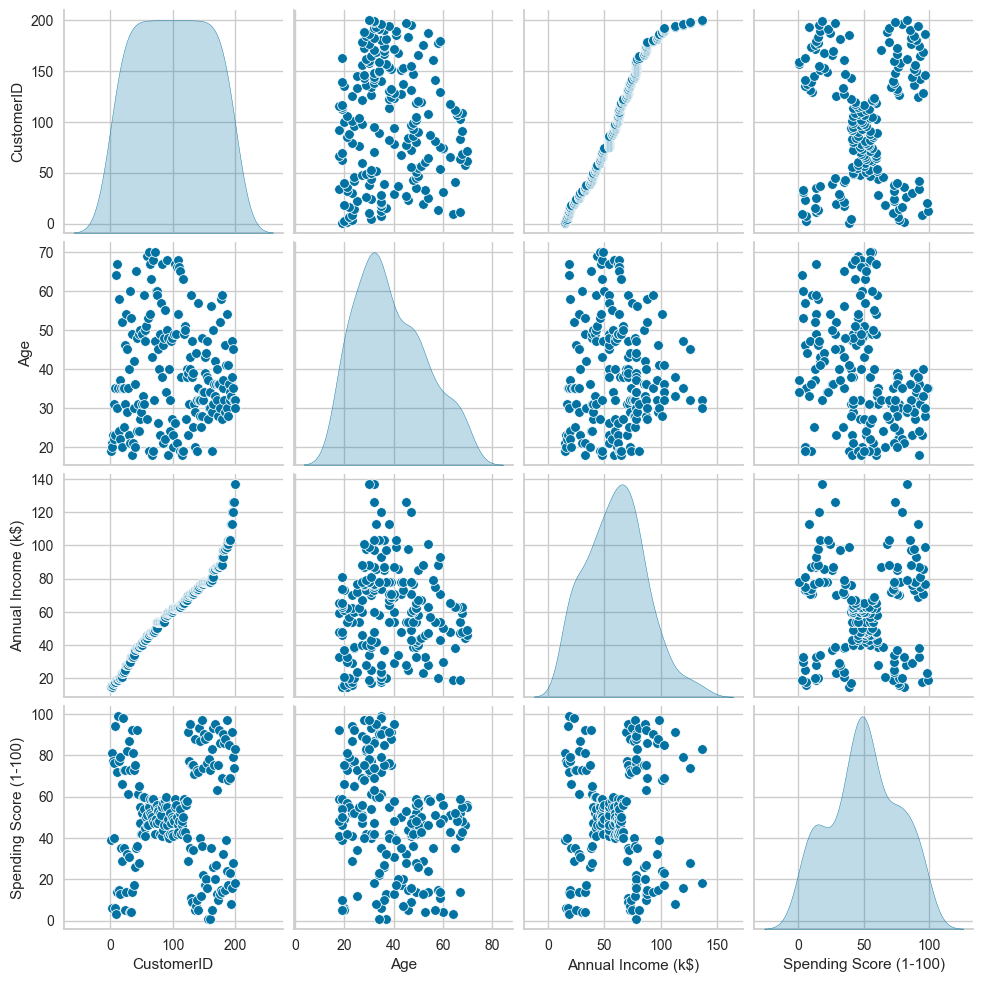

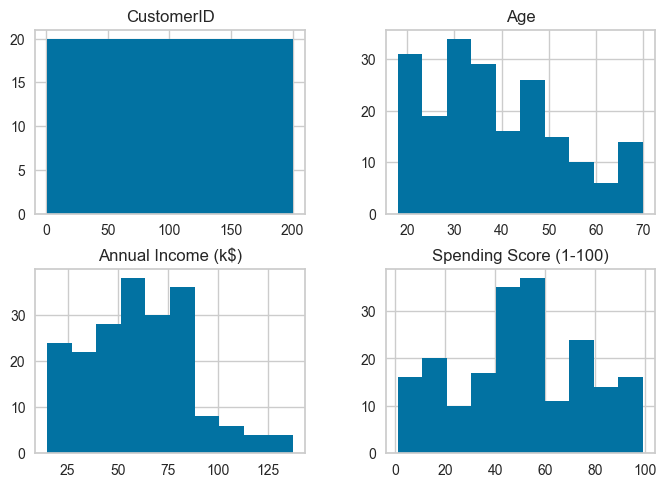

In [181]:
# preparing
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimpy as sk 
import pydotplus
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score, roc_curve
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from pycaret.classification import *
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, cophenet, linkage
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.spatial.distance import pdist


pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None); 

# Load data
df = pd.read_csv('data/Mall_Customers.csv')


sk.skim(df)
sns.pairplot(df, diag_kind='kde', palette='viridis')
df.hist()

In [182]:
# Check for missing values
print(df.info())
df.T.apply(lambda x: x.unique(), axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


CustomerID                [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Gender                                                       [Male, Female]
Age                       [19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 2...
Annual Income (k$)        [15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 28, 2...
Spending Score (1-100)    [39, 81, 6, 77, 40, 76, 94, 3, 72, 14, 99, 15,...
dtype: object

In [183]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [184]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

df_clustering = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']] #'Gender'

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)
df_clustering.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


<Axes: title={'center': 'Heatmap showing Correlation between all the features'}>

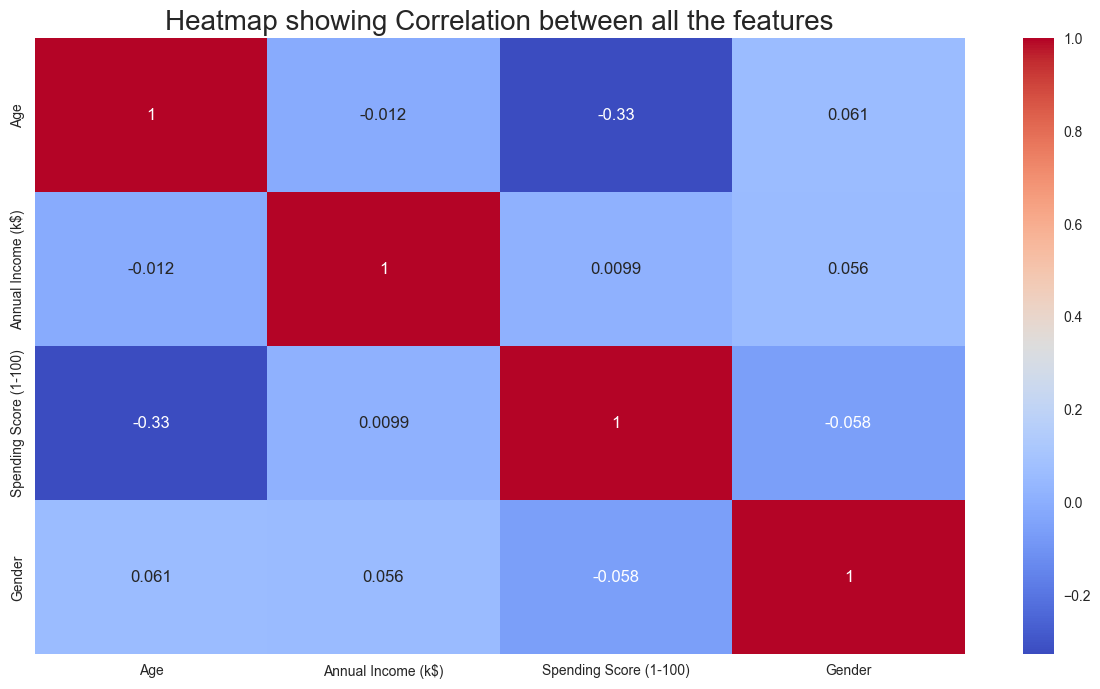

In [185]:
plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(df_clustering.corr(),annot = True, cmap='coolwarm')

In [186]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Manual config
kmeans = KMeans(n_clusters=4,
                init='random',  # Initialization method
                n_init=20,  # Number of times the algorithm is run
                max_iter=800,  # Maximum number of iterations
                tol=1e-12,  # Tolerance for convergence
                algorithm='lloyd')  # Algorithm used for the Lloyd's method
kmeans.fit(df_pca)

# Try using a different clustering algorithm
hclust = AgglomerativeClustering(n_clusters=4, linkage='ward')
hclust.fit(df_pca)

# Calculate the linkage matrix
Z = linkage(df_pca, 'ward')

# Calculate the silhouette score and calinski_harabasz score
silhouette = silhouette_score(df_pca, kmeans.labels_)
calinski_harabasz = calinski_harabasz_score(df_pca, kmeans.labels_)
c, coph_dists = cophenet(Z, pdist(df_pca))

print(f"calinski_harabasz score: {calinski_harabasz:.3f}")
print(f"Silhouette score: {silhouette:.3f}")
print(f"Cophenetic Correlation Coefficient: {c:.3f}")

calinski_harabasz score: 184.236
Silhouette score: 0.416
Cophenetic Correlation Coefficient: 0.612


In [187]:
# Print the cluster labels
print(kmeans.labels_)

# Print the cluster centroids
print(kmeans.cluster_centers_)

[1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 3 1 0 1 0 1 1 1 0 1 1 3 0 3 0 3 1 3 3 2 0 0 3 2 0 0 2 1 3 0 0 0
 3 2 0 3 1 0 3 3 3 0 1 3 0 1 1 0 0 2 3 0 1 2 0 1 3 2 1 0 3 2 3 1 0 3 3 3 3
 1 0 2 1 1 0 0 0 0 2 0 1 2 1 1 3 2 3 2 3 2 1 1 3 1 0 2 3 1 0 2 1 1 3 2 3 1
 0 2 3 2 0 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 2 3 2 3 2 3 1 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]
[[ 0.80089898 -0.95285608]
 [-1.15208536 -0.48631961]
 [-0.89664028  1.25740369]
 [ 1.12773395  0.75231371]]


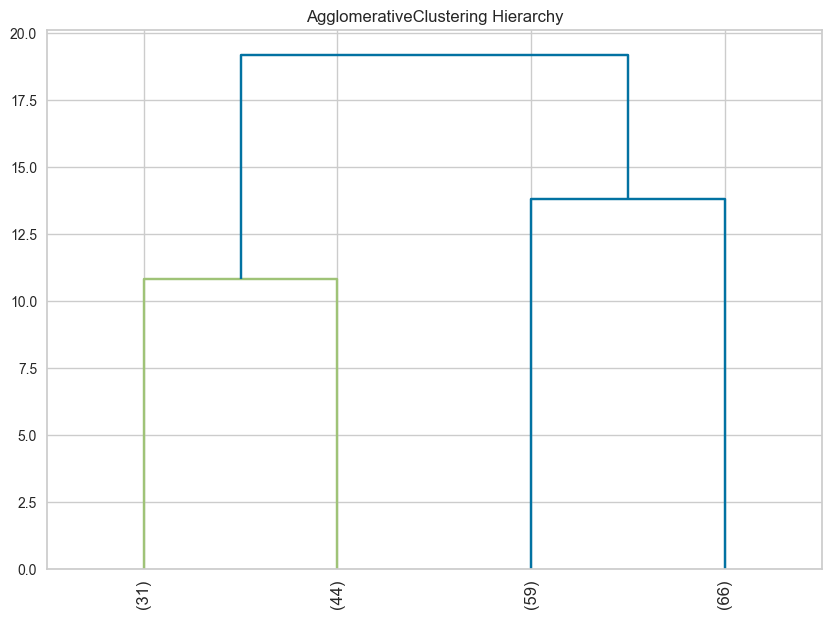

In [188]:
# Plot the dendrogram of AgglomerativeClustering Hierarchy
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='lastp', p=4, leaf_rotation=90, leaf_font_size=12)
plt.title("AgglomerativeClustering Hierarchy")
plt.show()

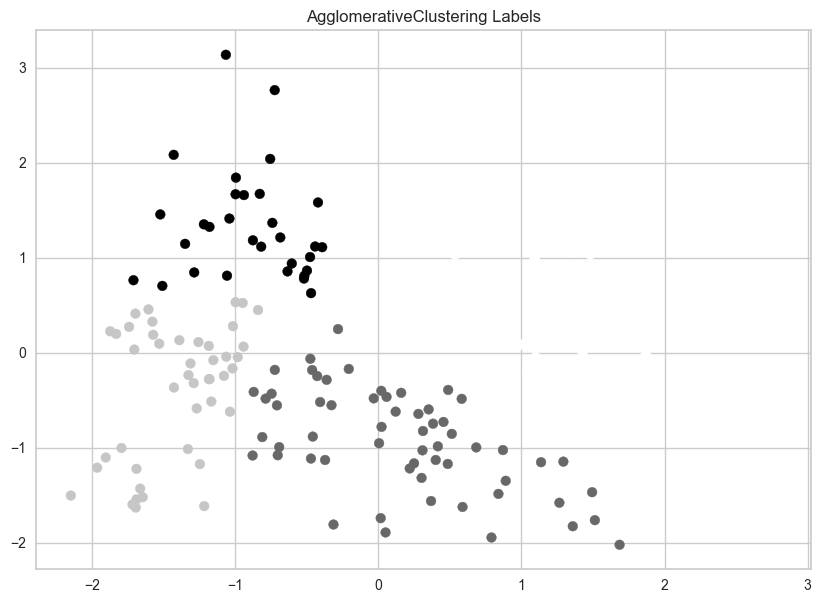

In [189]:
# Plot the data points with AgglomerativeClustering

plt.figure(figsize=(10, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=hclust.labels_)
plt.title("AgglomerativeClustering Labels")
plt.show()

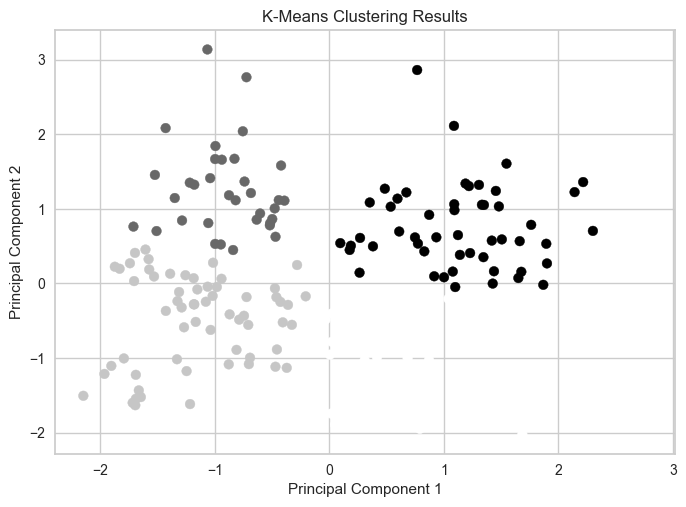

In [190]:
#K-Means Clustering Results
# Get the cluster labels
labels = kmeans.labels_

# Create a scatter plot of the clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels)
plt.title('K-Means Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

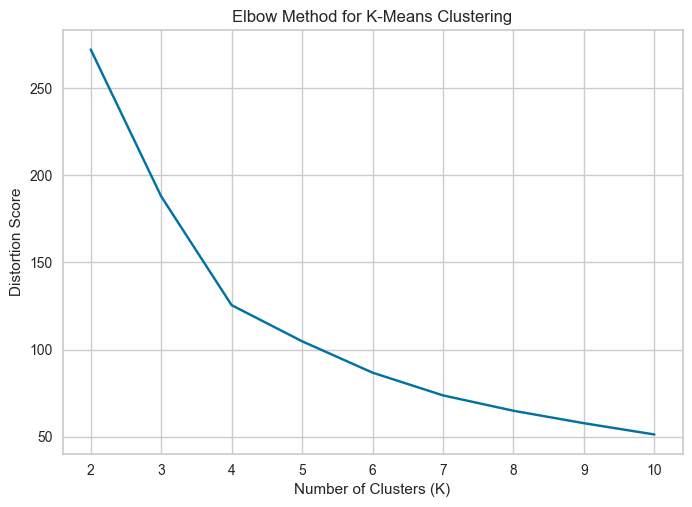

In [191]:
# Making use of Elbow Method for K-Means Clustering
# Create a list to store the distortion scores
distortion_scores = []

# Iterate over different values of K
for k in range(2, 11):
    # Perform K-Means clustering with K clusters
    kmeans = KMeans(n_clusters=k,
                    init='k-means++',  # Initialization method
                    n_init=50,  # Number of times the algorithm is run
                    max_iter=1000,  # Maximum number of iterations
                    tol=1e-6,  # Tolerance for convergence
                    algorithm='elkan')  # Algorithm used for the Lloyd's method
    kmeans.fit(df_pca)

    # Calculate the distortion score
    distortion_score = kmeans.inertia_
    distortion_scores.append(distortion_score)

# Plot the distortion scores against the number of clusters
plt.plot(range(2, 11), distortion_scores)
plt.title('Elbow Method for K-Means Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion Score')
plt.show()

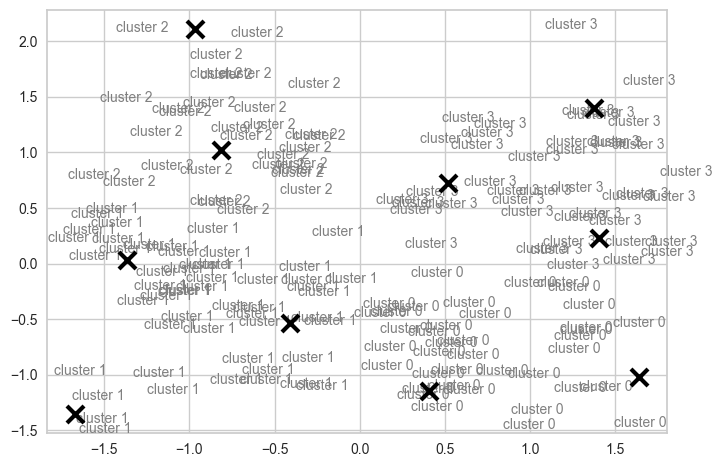

Text(0, 0.5, 'Principal Component 2')

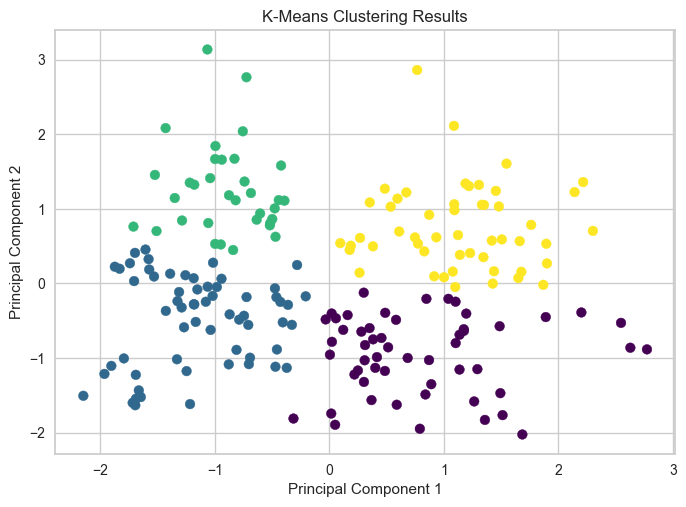

In [192]:
# Display the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=150, linewidths=3, color='black', zorder=10)

# Display the cluster labels
for i in range(len(df_pca)):
    plt.annotate(f'cluster {labels[i]}', (df_pca[i, 0], df_pca[i, 1]), fontsize=10, color='grey')
plt.show()

# Create a scatter plot of the clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis')
plt.title('K-Means Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

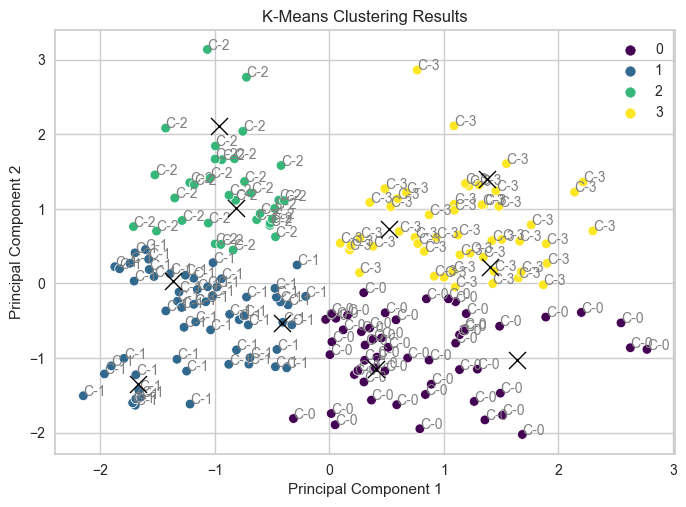

In [193]:
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=labels, palette='viridis')
plt.title('K-Means Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], marker='x', s=150, linewidths=3, color='black', zorder=10)

for i in range(len(df_pca)):
    plt.annotate(f'C-{labels[i]}', (df_pca[i, 0], df_pca[i, 1]), fontsize=10, color='grey')

plt.show()

Silhouette score: -0.007476168320540715


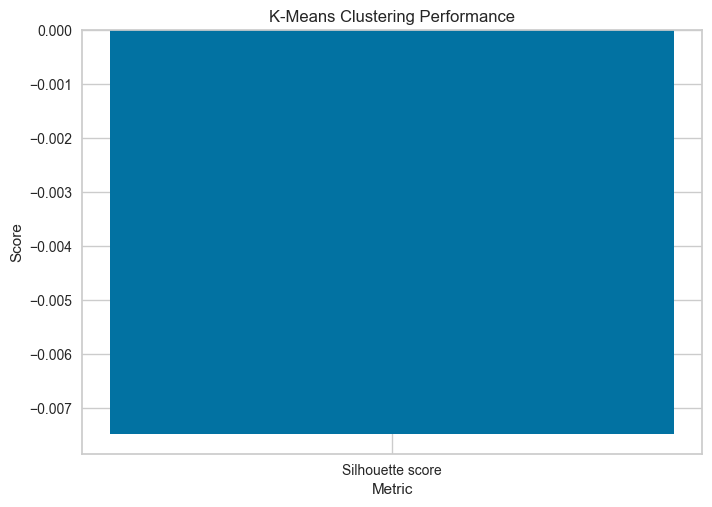

In [194]:
# trying to measure prediction score 
new_data = df[['Age', 'Annual Income (k$)']].sample(20)

# Apply the trained model to the new data
predictions = kmeans.predict(new_data)

# Calculate the silhouette score
silhouette = silhouette_score(new_data, predictions)
#calinski_harabasz = calinski_harabasz_score(new_data, predictions)

print("Silhouette score:", silhouette)

# Plot the silhouette score
plt.bar(['Silhouette score'], [silhouette])
#plt.bar(['calinski_harabasz score'], [calinski_harabasz])
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('K-Means Clustering Performance')
plt.show()
